## Produce Plots for the Pi0, NuMU, 2+ Shower, Near Sideband, Far Sideband ##

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
sys.path.append("../")
import data_loading as dl
import os
from microfit import run_plotter as rp
from microfit import histogram as hist
import matplotlib.pyplot as plt
from microfit import variable_definitions as vdef
from microfit import selections

In [3]:
from SidebandDraw import draw_sideband

#### Select the Runs to be plotted ####

In [4]:
#RUN_COMBOS_vv = [["1"],["2"],["3"],["4a"],["4b"],["4c"],["4d"],["5"],["1","2","3"],["1","2","3","4a","4b","4c","4d","5"]]
RUN_COMBOS_vv = [["1"]]
#RUN_COMBOS_vv = [["1"],["2"],["3"],["4a"],["4b"],["4c"],["4d"],["5"]]

### NuMu Sideband ###

In [5]:
variables = [vdef.numusel_variables]
selections = ["None","NUMU"]
preselections = ["NUMU","NUMU"]

draw_sideband(RUN_COMBOS_vv,
            selections,
            preselections,
            variables,
            "muon_sideband",
            loadpi0variables=False,
            loadshowervariables=False,
            loadrecoveryvars=False,
            loadsystematics=True,
            load_lee=False,
            blinded=False,
            enable_cache=True,
            numupresel=True,
            loadnumuvariables=True,
            use_bdt=False,
            load_numu_tki=False)

Making plots for runs ['1']
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 1
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run1/numupresel/NuMuSideband_bnb_beam_on_peleeTuple_uboone_v08_00_00_70_run1_C1.root


/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['pfp_generation_v', 'trk_mcs_muon_mom_v'], dtype='object')]

  encoding=encoding,


get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 1
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run1/numupresel/bnb_beam_off_peleeTuple_uboone_v08_00_00_70_run1.root
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 1
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run1/numupresel/overlay_peleeTuple_uboone_v08_00_00_70_run1_nu.root


/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['weightsFlux', 'weightsGenie', 'weightsReint', 'pfp_generation_v',
       'trk_mcs_muon_mom_v'],
      dtype='object')]

  encoding=encoding,


get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 1
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run1/numupresel/overlay_peleeTuple_uboone_v08_00_00_70_run1_nue.root
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 1
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run1/numupresel/overlay_peleeTuple_uboone_v08_00_00_70_run1_dirt.root
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading


### High Energy Sideband ###

In [6]:
variables = [vdef.NP_far_sideband_variables,vdef.bdtscore_variables]
selections = ["None","NPVL","NPL","NP_HIGH_ENERGY","NPVL_HIGH_ENERGY","NPL_HIGH_ENERGY","NPT_HIGH_ENERGY","NPBDT_HIGH_ENERGY"]
preselections = ["NP","NP","NP","NP","NP","NP","NP","NP"]
title = "Leading Shower Energy > 0.75 GeV"

draw_sideband(RUN_COMBOS_vv,
            selections,
            preselections,
            variables,
            "shr_energy_sideband",
            sideband_title=title,
            loadpi0variables=True,
            loadshowervariables=True,
            loadrecoveryvars=True,
            loadsystematics=True,
            load_lee=True,
            blinded=False,
            enable_cache=True,
            numupresel=False,
            loadnumuvariables=False,
            use_bdt=True,
            load_numu_tki=False)

Making plots for runs ['1']
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
Loading lee sample
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
The sideband data you're using had the following query applied:
shr_energy_tot_cali > 0.75
I will also apply this query to the MC you're loading


/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mamb

Making plots for runs ['1']
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
Loading lee sample
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
The sideband data you're using had the following query applied:
shr_energy_tot_cali > 0.75
I will also apply this query to the MC you're loading


/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3552, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_18435/664346746.py", line 22, in <module>
    load_numu_tki=False)
  File "/uboone/app/users/cthorpe/RefactoredPELEE/Sidebands/SidebandDraw.py", line 86, in draw_sideband
    plt.savefig(pltname)
  File "/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/pyplot.py", line 977, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/figure.py", line 3058, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 2325, in print_figure
    **kwargs)
  File "/uboone/app/users/cthorpe

TypeError: object of type 'NoneType' has no len()

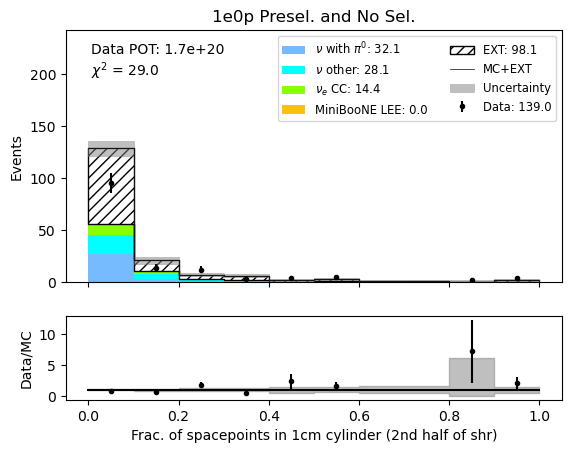

In [7]:
variables = [vdef.ZP_far_sideband_variables,vdef.bdtscore_variables]
selections = ["None","ZPLOOSESEL","ZPBDT"]
preselections = ["ZP","ZP","ZP"]
title = "Leading Shower Energy > 0.75 GeV"

draw_sideband(RUN_COMBOS_vv,
            selections,
            preselections,
            variables,
            "shr_energy_sideband",
            sideband_title=title,
            loadpi0variables=True,
            loadshowervariables=True,
            loadrecoveryvars=True,
            loadsystematics=True,
            load_lee=True,
            blinded=False,
            enable_cache=True,
            numupresel=False,
            loadnumuvariables=False,
            use_bdt=True,
            load_numu_tki=False)

In [5]:
variables = [vdef.NP_near_sideband_variables,vdef.bdtscore_variables]
selections = ["NP_MEDIUM_ENERGY","NPVL_MEDIUM_ENERGY","NPL_MEDIUM_ENERGY","NPT_MEDIUM_ENERGY","NPBDT_MEDIUM_ENERGY"]
preselections = ["NP","NP","NP","NP","NP"]
title = "Leading Shower Energy > 0.75 GeV"

draw_sideband(RUN_COMBOS_vv,
            selections,
            preselections,
            variables,
            "shr_energy_sideband",
            sideband_title=title,
            loadpi0variables=True,
            loadshowervariables=True,
            loadrecoveryvars=True,
            loadsystematics=True,
            load_lee=True,
            blinded=False,
            enable_cache=True,
            numupresel=False,
            loadnumuvariables=False,
            use_bdt=True,
            load_numu_tki=False)

Making plots for runs ['1']
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
Loading lee sample
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
The sideband data you're using had the following query applied:
shr_energy_tot_cali > 0.75
I will also apply this query to the MC you're loading


/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mamb

/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/uboone/app/users/cthorpe/Mamb

### Pi0 Sideband ###

In [ ]:
variables = [vdef.pi0_variables,vdef.NP_far_sideband_variables,vdef.ZP_far_sideband_variables,vdef.bdtscore_variables]
selections = ["PI0","None","None","ZPLOOSETWOSHR","ZPBDTTWOSHR","NPVLTWOSHR","NPLTWOSHR","NPBDTTWOSHR","NPTTWOSHR"]
preselections = ["PI0","ZP","NP","ZP","ZP","NP","NP","NP","NP"]
title = "Two Shower Sideband"

draw_sideband(RUN_COMBOS_vv,
            selections,
            preselections,
            variables,
            "two_shr_sideband",
            sideband_title=title,
            loadpi0variables=True,
            loadshowervariables=True,
            loadrecoveryvars=True,
            loadsystematics=True,
            load_lee=True,
            blinded=False,
            enable_cache=True,
            numupresel=False,
            loadnumuvariables=False,
            use_bdt=True,
            load_numu_tki=False)

### Near/Far Sidebands ###

In [ ]:
variables = [vdef.NP_far_sideband_variables]
selections = ["NP_HIGH_ENERGY","NPVL_HIGH_ENERGY","NPL_HIGH_ENERGY","NPBDT_HIGH_ENERGY","NP_LOW_PID","NPVL_LOW_PID","NPL_LOW_PID","NPT_LOW_PID"]
preselections = ["NP","NP","NP","NP","NP","NP","NP","NP"]

draw_sideband(RUN_COMBOS_vv,
            selections,
            preselections,
            variables,
            "bdt_sideband",
            loadpi0variables=True,
            loadshowervariables=True,
            loadrecoveryvars=True,
            loadsystematics=True,
            load_lee=True,
            blinded=False,
            enable_cache=True,
            numupresel=False,
            loadnumuvariables=False,
            use_bdt=True,
            load_numu_tki=False)

In [ ]:
variables = [vdef.ZP_far_sideband_variables]
selections = ["ZP_HIGH_ENERGY","ZPLOOSESEL_HIGH_ENERGY","ZPBDT_HIGH_ENERGY","ZP_LOW_PID","ZPLOOSESEL_LOW_PID"]
preselections = ["ZP","ZP","ZP","ZP","ZP"]

draw_sideband(RUN_COMBOS_vv,
            selections,
            preselections,
            variables,
            "bdt_sideband",
            loadpi0variables=True,
            loadshowervariables=True,
            loadrecoveryvars=True,
            loadsystematics=True,
            load_lee=True,
            blinded=False,
            enable_cache=True,
            numupresel=False,
            loadnumuvariables=False,
            use_bdt=True,
            load_numu_tki=False)

In [ ]:
variables = [vdef.NP_near_sideband_variables]
selections = ["NP_MEDIUM_ENERGY","NPVL_MEDIUM_ENERGY","NPL_MEDIUM_ENERGY","NPBDT_MEDIUM_ENERGY","NP_MEDIUM_PID","NPVL_MEDIUM_PID","NPL_MEDIUM_PID","NPT_MEDIUM_PID"]
preselections = ["NP","NP","NP","NP","NP","NP","NP","NP"]

draw_sideband(RUN_COMBOS_vv,
            selections,
            preselections,
            variables,
            "bdt_sideband",
            loadpi0variables=True,
            loadshowervariables=True,
            loadrecoveryvars=True,
            loadsystematics=True,
            load_lee=True,
            blinded=False,
            enable_cache=True,
            numupresel=False,
            loadnumuvariables=False,
            use_bdt=True,
            load_numu_tki=False)

In [ ]:
variables = [vdef.ZP_near_sideband_variables]
selections = ["ZP_MEDIUM_ENERGY","ZPLOOSESEL_MEDIUM_ENERGY","ZPBDT_MEDIUM_ENERGY","ZP_MEDIUM_PID","ZPLOOSESEL_MEDIUM_PID"]
preselections = ["ZP","ZP","ZP","ZP","ZP"]

draw_sideband(RUN_COMBOS_vv,
            selections,
            preselections,
            variables,
            "bdt_sideband",
            loadpi0variables=True,
            loadshowervariables=True,
            loadrecoveryvars=True,
            loadsystematics=True,
            load_lee=True,
            blinded=False,
            enable_cache=True,
            numupresel=False,
            loadnumuvariables=False,
            use_bdt=True,
            load_numu_tki=False)